In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.1 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import io
import ipywidgets as widgets


# Introduction
This lab is designed to introduce you to the basics of deep learning by interacting with a pre-built model. You'll understand the workflow of a deep learning project, including data preprocessing, model architecture, and making predictions. The goal is to familiarize yourself with the basics of deep learning without writing any code.


In [3]:
# Load the VGG16 model
model = VGG16(weights='imagenet')

# Display the model architecture
model.summary()


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

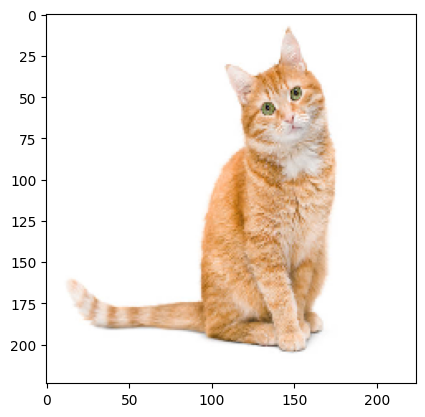

In [5]:
# Load and preprocess an image
def load_and_preprocess_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Expand dimensions to fit the model input
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image
    img_array = preprocess_input(img_array)

    return img, img_array

# Load and preprocess a sample image
sample_image, processed_image = load_and_preprocess_image('cat.jpg')

# Display the sample image
plt.imshow(sample_image)
plt.show()


In [6]:
# Make predictions
predictions = model.predict(processed_image)

# Decode and print the predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]
print(decoded_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[('n02123045', 'tabby', 0.37451524), ('n02123159', 'tiger_cat', 0.30655175), ('n02124075', 'Egyptian_cat', 0.22207436)]


In [8]:
# Upload button to load images
upload = widgets.FileUpload()
display(upload)

# Button to make predictions
predict_button = widgets.Button(description="Make Prediction")
display(predict_button)

# Function to handle button click
def on_click(change):
    img_data = list(upload.value.values())[0]['content']
    img = Image.open(io.BytesIO(img_data))
    img = img.resize((224, 224))

    # Preprocess and predict
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    # Display predictions
    print(decoded_predictions)

predict_button.on_click(on_click)


FileUpload(value={}, description='Upload')

Button(description='Make Prediction', style=ButtonStyle())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
[('n02123045', 'tabby', 0.41537073), ('n02123159', 'tiger_cat', 0.29467624), ('n02124075', 'Egyptian_cat', 0.19230145)]


# Conclusion and Discussion
Reflect on the lab activities. Discuss how the pre-trained model was able to make predictions, the role of data preprocessing, and the impact of input modifications on the model's predictions.
